In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('churn_clean.csv', index_col=0)
#Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [3]:
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# Identify continuous variables
continuous_vars = ['Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Children', 'Age', 'Income',
                    'MonthlyCharge', 'Bandwidth_GB_Year', 'Population', 'Tenure', 'Lat', 'Lng']

# Create a new DataFrame with only the continuous variables
clean_df = df[continuous_vars].copy()

In [5]:
clean_df

,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Children,Age,Income,MonthlyCharge,Bandwidth_GB_Year,Population,Tenure,Lat,Lng
CaseOrder,,,,,,,,,,,,,
1,7.978323,10,0,1,0,68,28561.99,172.455519,904.536110,38,6.795513,56.25100,-133.37571
2,11.699080,12,0,1,1,27,21704.77,242.632554,800.982766,10446,1.156681,44.32893,-84.24080
3,10.752800,9,0,1,4,50,9609.57,159.947583,2054.706961,3735,15.754144,45.35589,-123.24657
4,14.913540,15,2,0,1,48,18925.23,119.956840,2164.579412,13863,17.087227,32.96687,-117.24798
5,8.147417,16,2,1,0,83,40074.19,149.948316,271.493436,11352,1.670972,29.38012,-95.80673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9.415935,12,2,0,3,23,55723.74,159.979400,6511.252601,640,68.197130,43.43391,-72.78734
9997,6.740547,15,2,0,4,48,34129.34,207.481100,5695.951810,77168,61.040370,36.56907,-87.41694
9998,6.590911,10,0,0,1,48,45983.43,169.974100,4159.305799,406,47.416890,35.52039,-100.44180


In [6]:
# Standardize the continuous variables
scaler = StandardScaler()
clean_df[continuous_vars] = scaler.fit_transform(clean_df[continuous_vars])

In [7]:
cleaneddf= clean_df[['Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Children', 'Age', 'Income',
                    'MonthlyCharge', 'Bandwidth_GB_Year', 'Population', 'Tenure', 'Lat', 'Lng']].copy()

In [8]:
cleaneddf.head()

,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Children,Age,Income,MonthlyCharge,Bandwidth_GB_Year,Population,Tenure,Lat,Lng
CaseOrder,,,,,,,,,,,,,
1,-0.679978,-0.666282,-1.005852,0.946658,-0.972338,0.720925,-0.398778,-0.003943,-1.138487,-0.673405,-1.048746,3.217410,-2.810432
2,0.570331,-0.005288,-1.005852,0.946658,-0.506592,-1.259957,-0.641954,1.630326,-1.185876,0.047772,-1.262001,1.024691,0.431644
3,0.252347,-0.996779,-1.005852,0.946658,0.890646,-0.148730,-1.070885,-0.295225,-0.612138,-0.417238,-0.709940,1.213570,-2.142079
4,1.650506,0.986203,1.017588,-0.625864,-0.506592,-0.245359,-0.740525,-1.226521,-0.561857,0.284537,-0.659524,-1.065031,-1.746273
5,-0.623156,1.316700,1.017588,0.946658,-0.972338,1.445638,0.009478,-0.528086,-1.428184,0.110549,-1.242551,-1.724710,-0.331512


In [9]:
# Save the cleaned dataset
cleaneddf.to_csv("cleaned_churn_data.csv", index=False)

In [10]:
cleaneddf.cov()

,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Children,Age,Income,MonthlyCharge,Bandwidth_GB_Year,Population,Tenure,Lat,Lng
Outage_sec_perweek,1.000100,0.003994,0.015093,0.002909,0.001889,-0.008048,-0.010012,0.020498,0.004176,0.005484,0.002932,0.004827,0.005647
Email,0.003994,1.000100,0.003041,-0.016356,0.004479,0.001588,-0.009268,0.001997,-0.014581,0.017963,-0.014469,-0.030045,0.007873
Contacts,0.015093,0.003041,1.000100,-0.006033,-0.020778,0.015069,0.001233,0.004259,0.003299,0.004019,0.002820,-0.002214,0.008119
Yearly_equip_failure,0.002909,-0.016356,-0.006033,1.000100,0.007321,0.008578,0.005424,-0.007173,0.012035,-0.004483,0.012436,-0.007126,-0.005578
Children,0.001889,0.004479,-0.020778,0.007321,1.000100,-0.029735,0.009943,-0.009782,0.025587,-0.005877,-0.005092,-0.000452,0.013636
Age,-0.008048,0.001588,0.015069,0.008578,-0.029735,1.000100,-0.004091,0.010730,-0.014725,0.010539,0.016981,-0.002943,0.012118
Income,-0.010012,-0.009268,0.001233,0.005424,0.009943,-0.004091,1.000100,-0.003014,0.003674,-0.008639,0.002115,0.006564,-0.002997
MonthlyCharge,0.020498,0.001997,0.004259,-0.007173,-0.009782,0.010730,-0.003014,1.000100,0.060412,-0.004779,-0.003337,0.001406,0.011767
Bandwidth_GB_Year,0.004176,-0.014581,0.003299,0.012035,0.025587,-0.014725,0.003674,0.060412,1.000100,-0.003902,0.991594,-0.016951,0.003446
Population,0.005484,0.017963,0.004019,-0.004483,-0.005877,0.010539,-0.008639,-0.004779,-0.003902,1.000100,-0.003560,-0.220620,-0.048299


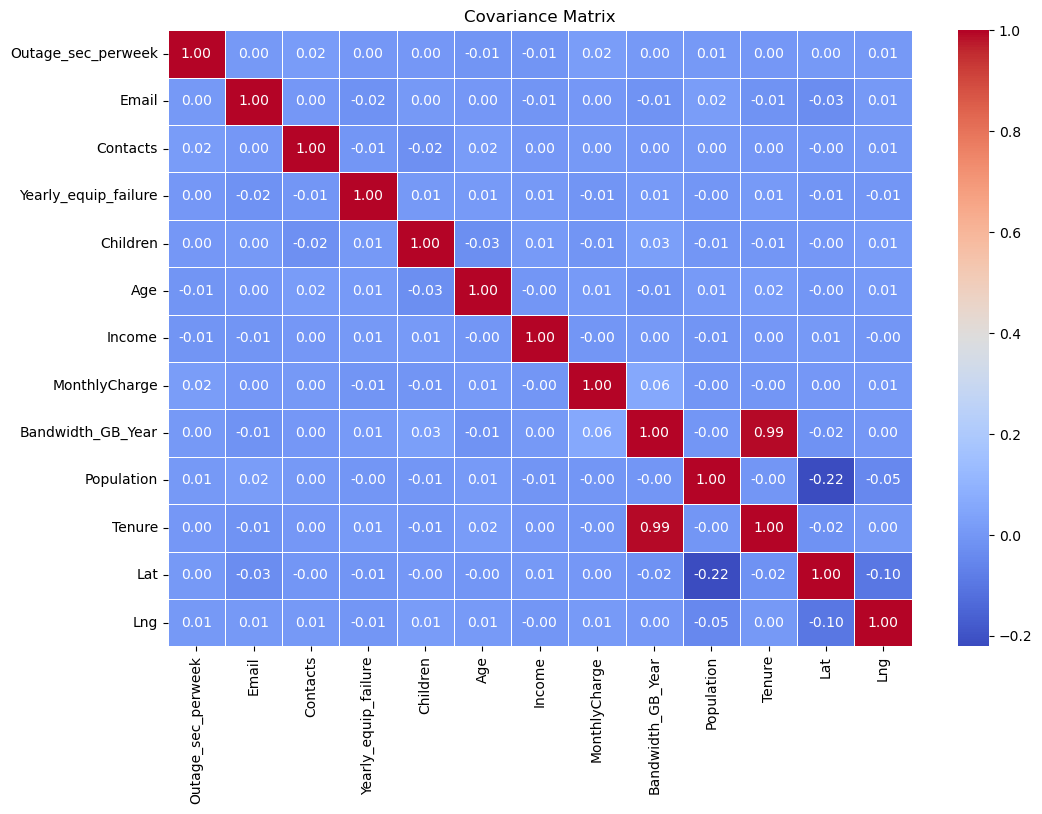

In [11]:
# Calculate the covariance matrix
covariance_matrix = cleaneddf.cov()

# Create a heatmap for the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(covariance_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Covariance Matrix")
plt.show()

In [12]:
# Display descriptive statistics of the covariance matrix
cov_stats = covariance_matrix.describe()

# Display the top positively and negatively correlated pairs
top_corr_positive = covariance_matrix.unstack().sort_values().drop_duplicates().tail(5)
top_corr_negative = covariance_matrix.unstack().sort_values().drop_duplicates().head(5)

# Display the results
print("Descriptive Statistics of Covariance Matrix:")
print(cov_stats)

print("\nTop Positively Correlated Pairs:")
print(top_corr_positive)

print("\nTop Negatively Correlated Pairs:")
print(top_corr_negative)

Descriptive Statistics of Covariance Matrix:
       Outage_sec_perweek      Email   Contacts  Yearly_equip_failure  \
count           13.000000  13.000000  13.000000             13.000000   
mean             0.080730   0.073563   0.079079              0.077081   
std              0.276349   0.278682   0.276882              0.277471   
min             -0.010012  -0.030045  -0.020778             -0.016356   
25%              0.002909  -0.014469   0.001233             -0.006033   
50%              0.004176   0.001997   0.003299              0.002909   
75%              0.005647   0.004479   0.008119              0.008578   
max              1.000100   1.000100   1.000100              1.000100   

        Children        Age     Income  MonthlyCharge  Bandwidth_GB_Year  \
count  13.000000  13.000000  13.000000      13.000000          13.000000   
mean    0.076249   0.078166   0.076233       0.083314           0.158013   
std     0.277955   0.277327   0.277659       0.276059           0.372

In [13]:

# Perform PCA
pca = PCA(n_components=13, random_state=369)
principal_components = pca.fit_transform(cleaneddf)

# Create a DataFrame with rounded principal components
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, 14)])

print(pca_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.632635 -3.296354  0.578184  2.947064  0.049200  0.236283 -1.239584   
1    -1.678890 -0.663793 -0.165263 -0.587533 -0.864341  1.227328 -1.145874   
2    -0.947985 -1.662107  1.500542  1.260078 -0.604303  1.120935 -1.470020   
3    -0.928918  0.883883 -0.255494  1.343020 -1.897874  0.114564  0.424392   
4    -1.889784  1.581549 -0.992000  0.972279  1.138263 -0.503190 -0.011660   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.883026 -0.917225  0.119696 -1.368667 -0.215508 -0.483779  1.335592   
9996  1.468912  3.517718  0.444508  0.815071 -1.000443 -0.606728  0.790954   
9997  0.583453 -0.277782  0.760598  0.478853  0.423992 -0.918188 -0.197058   
9998  2.036320  2.007936 -0.955911 -0.130067 -1.730513  0.281978 -0.288711   
9999  1.574521  0.967941 -0.794447 -0.841324 -1.957076 -0.529423 -0.461146   

           PC8       PC9      PC10      PC11      PC12      PC1

In [14]:
# Print explained variance ratio
print(pca.explained_variance_ratio_)


[0.15343888 0.09492523 0.08105111 0.08035308 0.0787066  0.07774467
 0.07686174 0.07635199 0.07572558 0.07398386 0.07387687 0.05655995
 0.00042042]


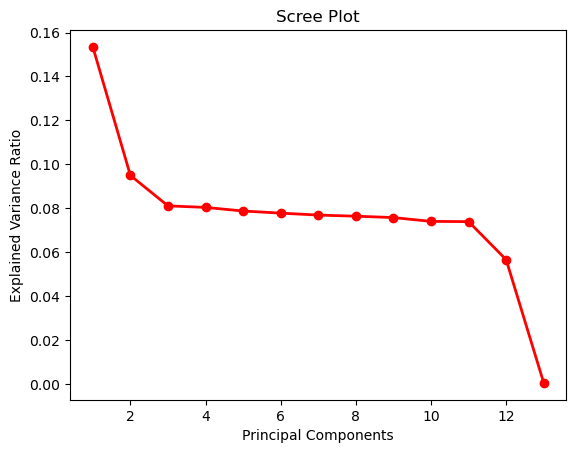

In [15]:
# Plot the explained variance ratio
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [16]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.15343888 0.09492523 0.08105111 0.08035308 0.0787066  0.07774467
 0.07686174 0.07635199 0.07572558 0.07398386 0.07387687 0.05655995
 0.00042042]
Cumulative Prop. Variance Explained:  [0.15343888 0.24836412 0.32941522 0.4097683  0.4884749  0.56621957
 0.64308131 0.71943331 0.79515889 0.86914276 0.94301962 0.99957958
 1.        ]


In [17]:
# Get eigenvalues
eigenvalues = pca.explained_variance_

# Print the eigenvalues
print("\nEigenvalues:")
print(eigenvalues)


Eigenvalues:
[1.99490495 1.23415146 1.05376978 1.04469451 1.02328808 1.01078182
 0.99930258 0.99267518 0.98453106 0.9618864  0.96049531 0.73535295
 0.00546605]


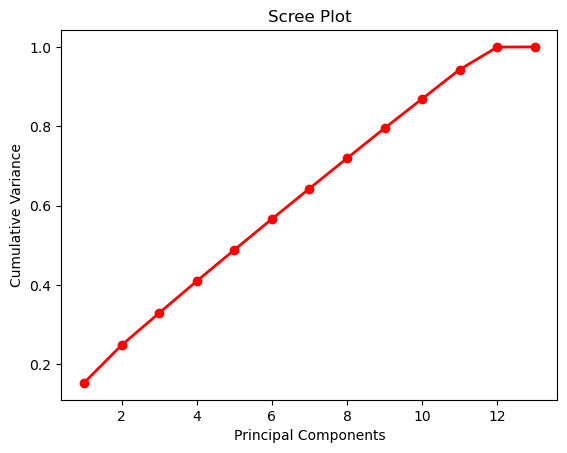

In [18]:
# Plot the cumulative variance ratio
PC_values = np.arange(pca.n_components_) +1
plt.plot(PC_values, out_sum, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [19]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], index=cleaneddf.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Outage_sec_perweek,0.005811,0.009174,-0.249550,-0.126214,-0.455981,0.597523,0.051915,-0.184658,0.057056,-0.515406,0.223304,-0.034155,0.000271
Email,-0.020020,0.152355,-0.092711,-0.144998,-0.353186,-0.403463,0.003835,-0.125375,0.760622,-0.052146,-0.247985,0.027357,0.000274
Contacts,0.004283,0.031043,-0.447906,0.108875,0.011245,0.082442,0.519791,-0.510974,-0.052695,0.494601,-0.028194,-0.011878,-0.000947
Yearly_equip_failure,0.017665,-0.007070,0.153686,0.063449,0.420468,0.592380,-0.290766,-0.194665,0.397088,0.143419,-0.376943,0.038880,-0.000083
Children,0.014244,-0.014267,0.447882,-0.464670,-0.107498,0.130597,0.034812,-0.065531,0.192459,0.437471,0.565626,-0.011794,-0.021597
Age,0.001860,0.052795,-0.443537,0.227235,0.436759,-0.096321,-0.188399,0.093484,0.342892,-0.083596,0.614892,-0.037729,0.022360
Income,0.004185,-0.054602,0.195742,-0.041772,0.312779,0.100371,0.773549,0.335467,0.246663,-0.275852,-0.033742,0.006645,-0.000941
MonthlyCharge,0.040456,-0.004500,-0.404228,-0.136041,-0.218356,0.257205,-0.041495,0.714123,0.060669,0.405280,-0.144376,-0.006021,-0.045766
Bandwidth_GB_Year,0.706719,-0.010435,0.008289,-0.002713,-0.021522,-0.012558,0.003902,0.002926,0.002798,0.005673,-0.006102,0.009429,0.706791
Population,-0.001230,0.653439,0.151916,0.322012,-0.119517,0.098791,0.053682,0.079161,-0.027392,0.055304,0.100818,0.631729,-0.000070


In [20]:
print("Principal components contributions:")
for name, contribution in zip(loadings.columns, pca.explained_variance_ratio_ * 100):
    print(f"{name}: {round(contribution, 2)}%")


Principal components contributions:
PC1: 15.34%
PC2: 9.49%
PC3: 8.11%
PC4: 8.04%
PC5: 7.87%
PC6: 7.77%
PC7: 7.69%
PC8: 7.64%
PC9: 7.57%
PC10: 7.4%
PC11: 7.39%
PC12: 5.66%
PC13: 0.04%


In [21]:
#remove  from loadings
final_loadings = pd.DataFrame(pca.components_[:3, :].T, columns=[f'PC{i}' for i in range(1, 4)], index=cleaneddf.columns)
final_loadings

,PC1,PC2,PC3
Outage_sec_perweek,0.005811,0.009174,-0.249550
Email,-0.020020,0.152355,-0.092711
Contacts,0.004283,0.031043,-0.447906
Yearly_equip_failure,0.017665,-0.007070,0.153686
Children,0.014244,-0.014267,0.447882
Age,0.001860,0.052795,-0.443537
Income,0.004185,-0.054602,0.195742
MonthlyCharge,0.040456,-0.004500,-0.404228
Bandwidth_GB_Year,0.706719,-0.010435,0.008289
Population,-0.001230,0.653439,0.151916


In [22]:
# total contribution
total_contribution = 0

print("Principal components contributions:")
for name, contribution in zip(final_loadings.columns, pca.explained_variance_ratio_ * 100):
    rounded_contribution = round(contribution, 2)
    print(f"{name}: {rounded_contribution}%")
    total_contribution += rounded_contribution

# Print the total contribution
print(f"\nTotal Contribution: {round(total_contribution, 2)}%")


Principal components contributions:
PC1: 15.34%
PC2: 9.49%
PC3: 8.11%

Total Contribution: 32.94%


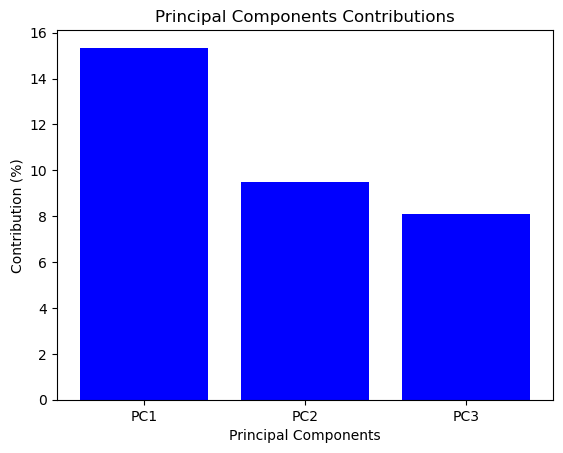

In [24]:

# Initialize lists to store component names and contributions
component_names = final_loadings.columns
contributions = pca.explained_variance_ratio_[:3] * 100

# Plotting the contributions for each principal component
plt.bar(component_names, contributions, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Contribution (%)')
plt.title('Principal Components Contributions')
plt.show()


In [25]:
# Print the variance of each principal component
variance_explained = pca.explained_variance_
print(pd.DataFrame({'Principal Component': [f'PC{i}' for i in range(1, len(continuous_vars)+1)],
                    'Variance Explained': variance_explained}))

   Principal Component  Variance Explained
0                  PC1            1.994905
1                  PC2            1.234151
2                  PC3            1.053770
3                  PC4            1.044695
4                  PC5            1.023288
5                  PC6            1.010782
6                  PC7            0.999303
7                  PC8            0.992675
8                  PC9            0.984531
9                 PC10            0.961886
10                PC11            0.960495
11                PC12            0.735353
12                PC13            0.005466


In [26]:
# Calculate cumulative variance explained
cumulative_variance = variance_explained.cumsum()

# Print the cumulative variance explained
print(pd.DataFrame({'Principal Component': [f'PC{i}' for i in range(1, len(continuous_vars)+1)],
                    'Cumulative Variance Explained': cumulative_variance}))

   Principal Component  Cumulative Variance Explained
0                  PC1                       1.994905
1                  PC2                       3.229056
2                  PC3                       4.282826
3                  PC4                       5.327521
4                  PC5                       6.350809
5                  PC6                       7.361591
6                  PC7                       8.360893
7                  PC8                       9.353568
8                  PC9                      10.338099
9                 PC10                      11.299986
10                PC11                      12.260481
11                PC12                      12.995834
12                PC13                      13.001300


In [27]:
# Calculate total variance captured
total_variance_captured = cumulative_variance[-1]
print(f'\nTotal Variance Captured: {total_variance_captured:.4f}')


Total Variance Captured: 13.0013
